# Lecture 169 - Part 3 Section 28 - Training OLS Regression Model with Scikit-Learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [3]:
penguins = sns.load_dataset('penguins')

In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
# Query out only 1 species for basic regression.  With more complex models
# being taught in later lectures.
# Lecturer skipped dropping NaN values so had to come back and do so

Adelie = penguins[penguins.species == 'Adelie']
Adelie = Adelie.dropna()
Adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [21]:
# Run the Regression.
# Firstly create a model
# Capital X used as variable in fit stage as X is a matrix
# X variable column in double brackets to make a list as get an error when only 1 dim array

model1 = LinearRegression()

# Fit the data to the model:

# model1.fit(X = Adelie[['flipper_length_mm']], y = Adelie.body_mass_g, )

# Another way to do it:

model1.fit(X = Adelie['flipper_length_mm'].to_numpy().reshape(-1, 1), y = Adelie.body_mass_g, )

LinearRegression()

In [22]:
model1.intercept_

-2508.08774289271

In [24]:
# Show Slope

model1.coef_

array([32.68891409])

In [28]:
# Show R^2 - ahows how good the fit is:

model1.score(X=Adelie[['flipper_length_mm']], y=Adelie['body_mass_g'])

0.21608917647916992

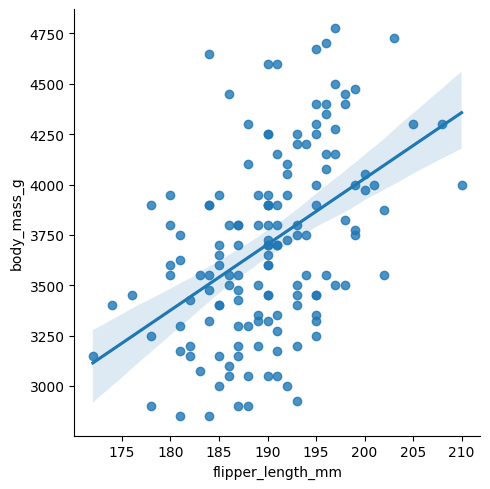

In [34]:
# Plot it with an lms plot:
# Shows out 21% match

plot1=sns.lmplot(data=Adelie, x='flipper_length_mm', y='body_mass_g')
plot1.fig.savefig(r'output/lmsplotFlengthBmass.png')

In [35]:
# Predict

Adelie['predicted_body_mass'] = model1.predict(X=Adelie[['flipper_length_mm']])
Adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_body_mass
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3408.605707
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3572.050277
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3866.250504
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3800.872676
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3702.805933
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female,3506.672449
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female,3866.250504
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male,3800.872676
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female,3604.739191
